# Exploratory Data Analysis: Taylor Swift Spotify Data Set

Reference: https://www.kaggle.com/code/aaronjones32/predicting-song-popularity-from-spotify-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

TS = pd.read_csv("taylor_swift_spotify.csv")
display(TS)
TS.info()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1,7G0gBu6nLdhFDPRLc0HdDG,spotify:track:7G0gBu6nLdhFDPRLc0HdDG,0.00444,0.646,0.783,0.000001,0.1710,-2.846,0.0356,121.080,0.490,87,231706
1,1,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,2,3MytWN8L7shNYzGl4tAKRp,spotify:track:3MytWN8L7shNYzGl4tAKRp,0.02510,0.588,0.758,0.000000,0.1310,-2.347,0.0305,114.991,0.387,84,261230
2,2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,3,79uDOz0zuuWS7HWxzMmTa2,spotify:track:79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.1170,-3.927,0.0273,142.063,0.203,88,294189
3,3,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,4,5xXqyjLicvEpch72qEryFT,spotify:track:5xXqyjLicvEpch72qEryFT,0.24800,0.727,0.677,0.000000,0.1430,-2.871,0.0325,118.995,0.639,84,242473
4,4,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5,1zU8j1x3yi9xalMF96pzKp,spotify:track:1zU8j1x3yi9xalMF96pzKp,0.02360,0.419,0.470,0.000000,0.1630,-5.016,0.0296,119.294,0.133,84,405906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,Our Song,Taylor Swift,2006-10-24,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,78,201106
483,483,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,64,213053
484,484,Invisible,Taylor Swift,2006-10-24,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,60,203226
485,485,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,58,220146


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        487 non-null    int64  
 1   name              487 non-null    object 
 2   album             487 non-null    object 
 3   release_date      487 non-null    object 
 4   track_number      487 non-null    int64  
 5   id                487 non-null    object 
 6   uri               487 non-null    object 
 7   acousticness      487 non-null    float64
 8   danceability      487 non-null    float64
 9   energy            487 non-null    float64
 10  instrumentalness  487 non-null    float64
 11  liveness          487 non-null    float64
 12  loudness          487 non-null    float64
 13  speechiness       487 non-null    float64
 14  tempo             487 non-null    float64
 15  valence           487 non-null    float64
 16  popularity        487 non-null    int64  
 1

## Correlation map for numerical features

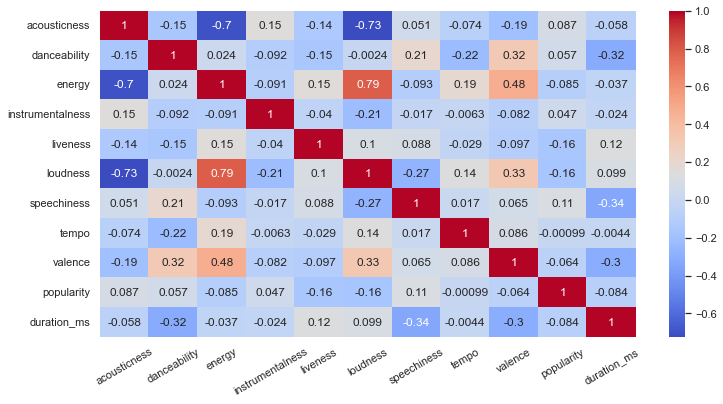

In [2]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
corr = TS.drop(columns=["Unnamed: 0","track_number"]).corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.xticks(rotation=30)
plt.show()

In [3]:
TS['album'].value_counts()

reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
Speak Now (Taylor's Version)                                                           22
Red (Deluxe Edition)                                                                   22
Speak Now (Deluxe Edition)                                                             20
Midnights (3am Edition)                                                                20
Fearless Platinum Edition                                                              19
1989 (Deluxe Edition)                                                                  19
Lover     

## Visualize album characteristics as box plots

,Album,Features,Values
0,Speak Now (Taylor's Version),acousticness,0.00444
1,Speak Now (Taylor's Version),acousticness,0.02510
2,Speak Now (Taylor's Version),acousticness,0.00621
3,Speak Now (Taylor's Version),acousticness,0.24800
4,Speak Now (Taylor's Version),acousticness,0.02360
...,...,...,...
3404,Taylor Swift,valence,0.53900
3405,Taylor Swift,valence,0.51800
3406,Taylor Swift,valence,0.23300
3407,Taylor Swift,valence,0.26800


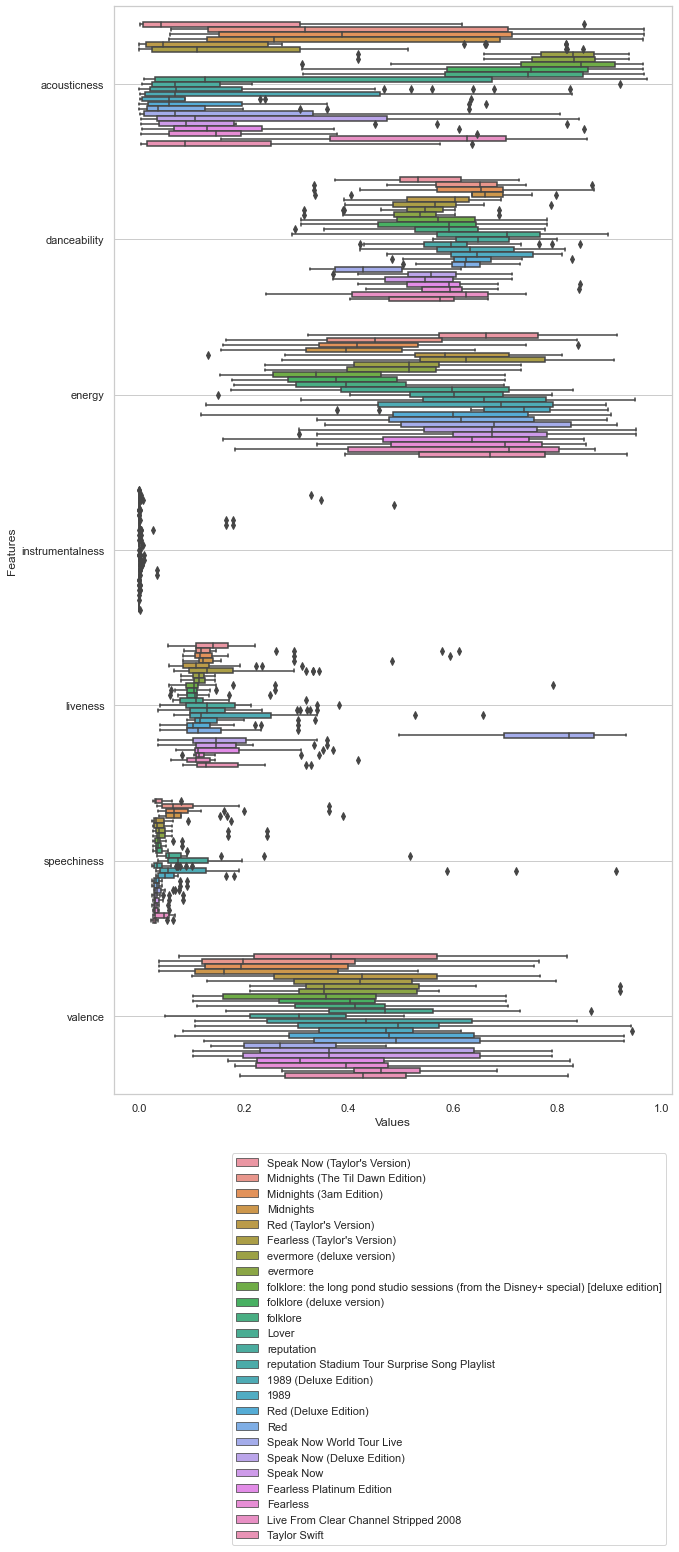

In [4]:
# Collect all features having [0, 1] as the range of values
melted_TS = pd.melt(TS, id_vars="album", value_vars=TS.columns.values[np.r_[7:12, 13, 15]])
melted_TS.columns = ['Album', 'Features', 'Values']
display(melted_TS)

# Plot boxplots per album
plt.figure(figsize=(10,20))
sns.boxplot(data=melted_TS, width=0.8, orient="h",
            x="Values", y="Features", hue='Album')
plt.rc('axes', labelsize=15)
plt.legend(bbox_to_anchor=(1, -0.05))
plt.grid()
plt.show()

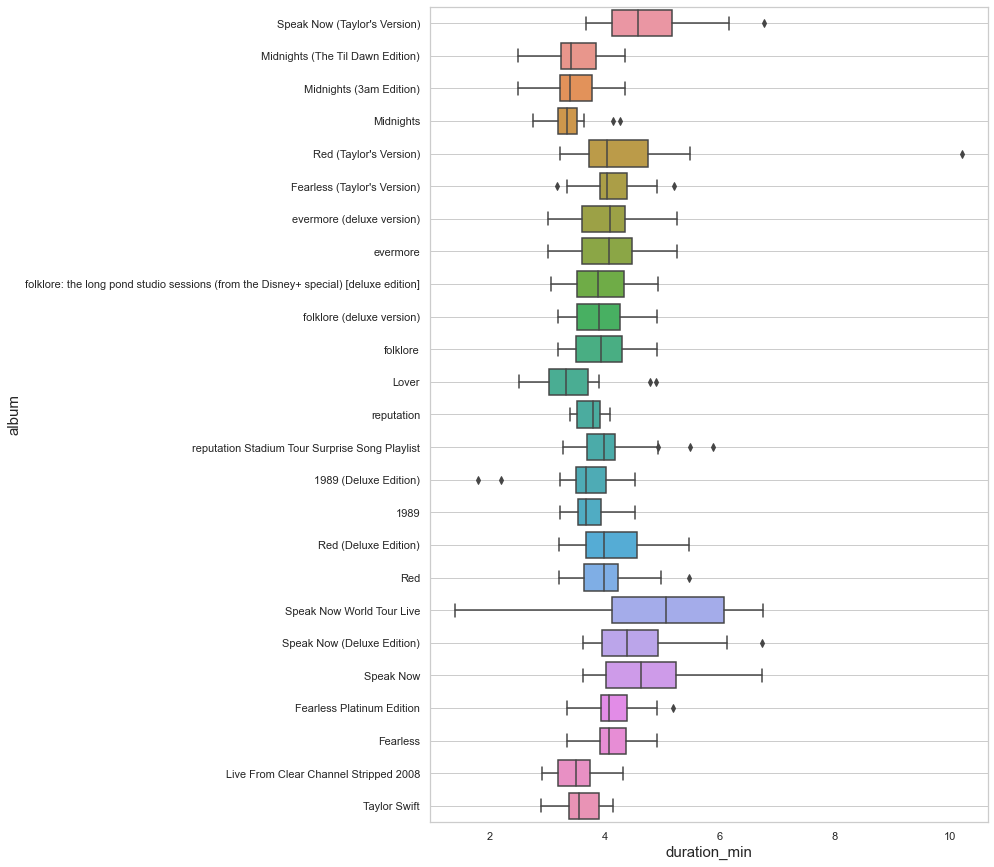

In [5]:
plt.figure(figsize=(10,15))
TS["duration_min"] = TS["duration_ms"]/60000
sns.boxplot(data=TS, x="duration_min", y="album")
plt.grid()
plt.show()
TS.drop(columns="duration_min", inplace=True)

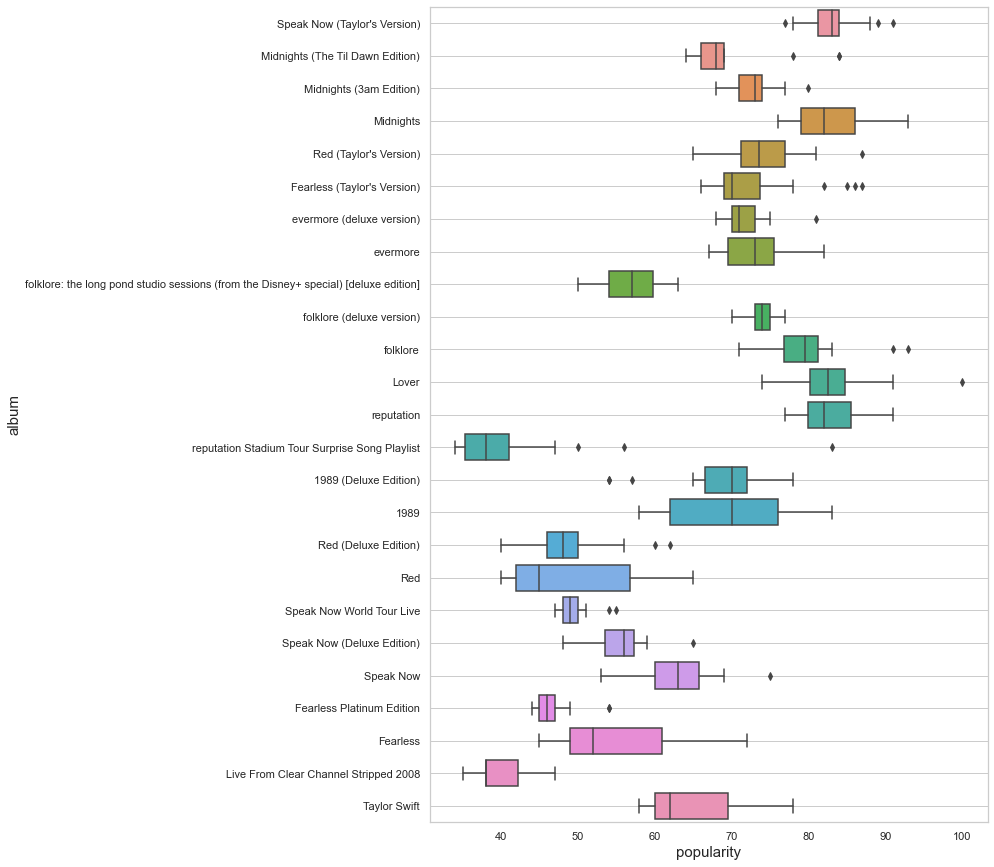

In [6]:
plt.figure(figsize=(10,15))
sns.boxplot(data=TS, x="popularity", y="album")
plt.grid()
plt.show()

## Rankings from the data set

In [7]:
for prop in TS.columns.values[7:]:
    print(f'Ranking by {prop}')
    sorted_TS = TS.sort_values(by=prop, ascending=False)[["name",prop]]
    display(sorted_TS.drop_duplicates(subset='name'))


Ranking by acousticness


,name,acousticness
249,It’s Nice To Have A Friend,0.971000
33,Sweet Nothing,0.967000
232,hoax,0.966000
198,hoax - the long pond studio sessions,0.962000
187,my tears ricochet - the long pond studio sessions,0.946000
...,...,...
384,The Story Of Us - Live,0.000480
83,22 (Taylor's Version),0.000443
78,State Of Grace (Taylor's Version),0.000328
344,State Of Grace,0.000197


Ranking by danceability


,name,danceability
238,I Think He Knows,0.897
52,Vigilante Shit,0.870
305,Hey Stephen,0.843
363,Treacherous - Original Demo Recording,0.828
241,Cornelia Street,0.824
...,...,...
155,tolerate it,0.316
182,the lakes - bonus track,0.313
169,exile (feat. Bon Iver),0.310
237,The Archer,0.292


Ranking by energy


,name,energy
409,Haunted,0.950
483,I'm Only Me When I'm With You,0.934
407,Better Than Revenge,0.917
11,Haunted (Taylor's Version),0.915
385,Mean - Live/2011,0.915
...,...,...
198,hoax - the long pond studio sessions,0.155
265,New Year’s Day,0.151
97,State Of Grace (Acoustic Version) (Taylor's Ve...,0.131
328,I Know Places - Voice Memo,0.128


Ranking by instrumentalness


,name,instrumentalness
74,Labyrinth,0.4880
145,long story short,0.1790
153,gold rush,0.1660
355,Sad Beautiful Tragic,0.0337
183,the 1 - the long pond studio sessions,0.0260
...,...,...
125,Superstar (Taylor’s Version),0.0000
124,Come In With The Rain (Taylor’s Version),0.0000
123,Forever & Always (Piano Version) (Taylor’s Ver...,0.0000
122,Untouchable (Taylor’s Version),0.0000


Ranking by liveness


,name,liveness
388,Better Than Revenge - Live/2011,0.9310
382,Sparks Fly - Live/2011,0.9180
396,Haunted - Live/2011,0.8890
394,Dear John - Live/2011,0.8840
386,Ours - Live/2011,0.8670
...,...,...
81,I Knew You Were Trouble (Taylor's Version),0.0576
185,the last great american dynasty - the long pon...,0.0574
6,The Story Of Us (Taylor's Version),0.0540
347,I Knew You Were Trouble.,0.0398


Ranking by loudness


,name,loudness
11,Haunted (Taylor's Version),-1.909
469,Picture To Burn - Live From Clear Channel Stri...,-1.953
473,Picture To Burn,-2.098
1,Sparks Fly (Taylor’s Version),-2.347
6,The Story Of Us (Taylor's Version),-2.608
...,...,...
330,Blank Space - Voice Memo,-15.064
54,Labyrinth,-15.434
365,State Of Grace - Acoustic,-15.910
329,I Wish You Would - Voice Memo,-16.394


Ranking by speechiness


,name,speechiness
329,I Wish You Would - Voice Memo,0.9120
330,Blank Space - Voice Memo,0.7210
328,I Know Places - Voice Memo,0.5890
233,I Forgot That You Existed,0.5190
72,Vigilante Shit,0.3900
...,...,...
352,Stay Stay Stay,0.0245
266,All Too Well,0.0244
297,Invisible,0.0243
436,SuperStar,0.0239


Ranking by tempo


,name,tempo
97,State Of Grace (Acoustic Version) (Taylor's Ve...,208.918
244,Soon You’ll Get Better (feat. The Chicks),207.476
468,Teardrops On My Guitar - Live From Clear Chann...,204.489
431,Long Live,204.125
13,Long Live (Taylor's Version),203.890
...,...,...
481,Mary's Song (Oh My My My),74.900
99,Better Man (Taylor's Version) (From The Vault),73.942
249,It’s Nice To Have A Friend,70.008
235,Lover,68.534


Ranking by valence


,name,valence
336,Shake It Off,0.9430
374,Stay Stay Stay,0.9280
164,closure,0.9200
240,Paper Rings,0.8650
305,Hey Stephen,0.8380
...,...,...
44,Karma (feat. Ice Spice),0.0734
365,State Of Grace - Acoustic,0.0682
59,Bigger Than The Whole Sky,0.0680
255,Delicate,0.0499


Ranking by popularity


,name,popularity
234,Cruel Summer,100
67,Anti-Hero,93
224,august,93
235,Lover,91
218,cardigan,91
...,...,...
468,Teardrops On My Guitar - Live From Clear Chann...,38
467,Untouchable - Live From Clear Channel Stripped...,38
470,Should've Said No - Live From Clear Channel St...,38
286,Babe,36


Ranking by duration_ms


,name,duration_ms
107,All Too Well (10 Minute Version) (Taylor's Ver...,613026
4,Dear John (Taylor's Version),405906
394,Dear John - Live/2011,404680
422,Dear John,403920
395,Enchanted - Live/2011,389213
...,...,...
249,It’s Nice To Have A Friend,150440
62,Glitch,148781
330,Blank Space - Voice Memo,131186
329,I Wish You Would - Voice Memo,107133


## Visualizing the frequency of release dates

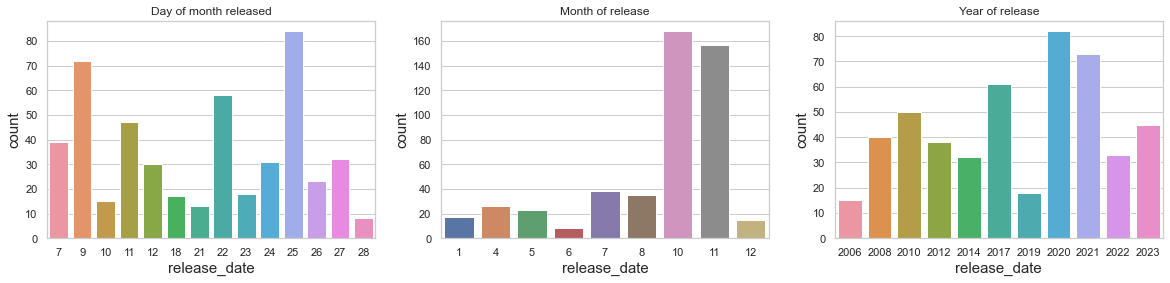

In [8]:
TS['release_date'] = pd.to_datetime(TS['release_date'])
month_of_release = TS['release_date'].dt.month
day_of_month = TS['release_date'].dt.day
year_of_release = TS['release_date'].dt.year

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4), sharey=False)

sns.countplot(x=day_of_month, ax=axes[0])
sns.countplot(x=month_of_release, ax=axes[1])
sns.countplot(x=year_of_release, ax=axes[2])

axes[0].set_title('Day of month released')
axes[1].set_title('Month of release')
axes[2].set_title('Year of release')
plt.show()

## Visualizing evolutions of data with time

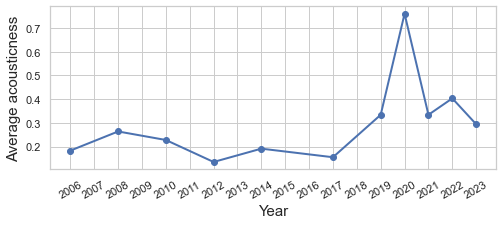

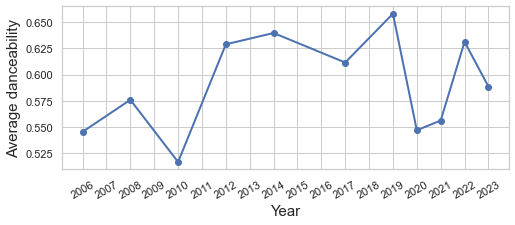

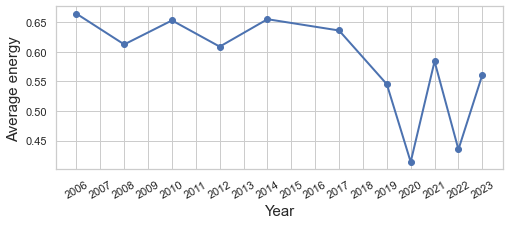

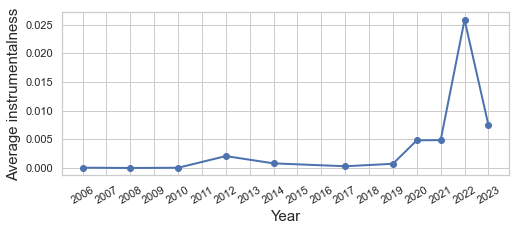

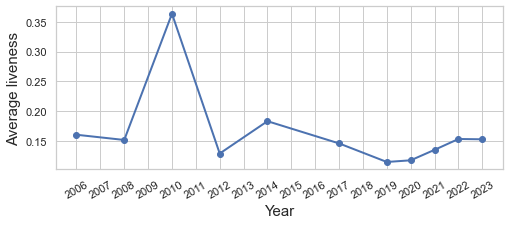

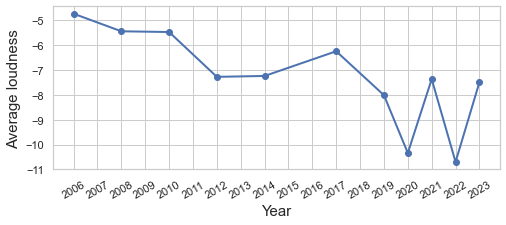

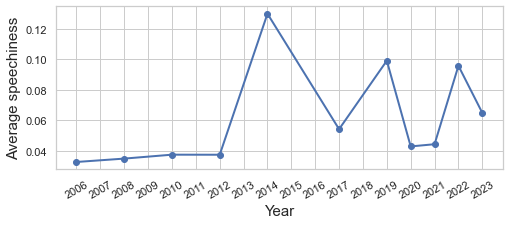

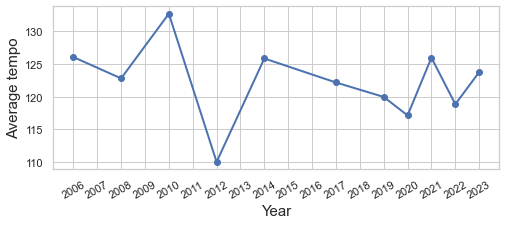

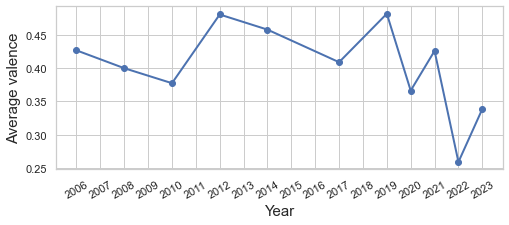

In [11]:
TS["release_year"] = year_of_release

for prop in TS.columns.values[7:16]:
    means = TS.groupby("release_year")[prop].mean()
    plt.figure(figsize=(8,3))
    plt.plot(means.index,means.loc[:],'bo-',linewidth=2)
    plt.xticks(np.arange(2006,2024), rotation=30)
    plt.ylabel(f"Average {prop}")
    plt.xlabel('Year')
    plt.show()